In [1]:
import sys

sys.path.append('..')

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import numpy as np

def get_bev2(velo_array, label_list=None, scores=None):
    '''
    Generate a Bird's Eye View (BEV) intensity image from the LiDAR point cloud.

    :param velo_array: A 3D numpy array of shape (H, W, D) where H and W are spatial dimensions,
                       and D is the number of features per grid cell.
    :param label_list: (Optional) A list of numpy arrays of shape [4, 2], representing bounding box corners.
    :param scores: (Optional) List of scores associated with each bounding box.
    :return: A 2D numpy array representing the BEV intensity image.
    '''
    map_height = velo_array.shape[0]

    # Compute the maximum value across all channels except the last one
    val = (1 - velo_array[::-1, :, :-1].max(axis=2)) * 255
    val = val.astype(np.uint8)

    # Create a grayscale intensity image
    intensity_image = val

    return intensity_image


import matplotlib.pyplot as plt
import numpy as np
from typing import List
def plot_bev2(velo_array: np.ndarray, label_list:List[np.ndarray] =None, scores=None):
    '''
    Plot a Bird's Eye View (BEV) Lidar and bounding boxes using Matplotlib.
    The heading of the vehicle is marked as a red line
    (which connects front right and front left corner).

    :param velo_array: A 3D numpy array of LiDAR data of shape (800,700,36)
    :param label_list: A list of numpy arrays of shape [4, 2], which correspond to the 4 corners' (x, y).
                       The corners should be in the following sequence:
                       rear left, rear right, front right, and front left.
    :param scores: Optional list of scores for the bounding boxes.
    :return: None
    '''
    print("LOG: executing plot_bev2")
    
    # Generate the BEV intensity image
    intensity = get_bev2(velo_array, label_list, scores)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(intensity, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    
    # Optionally, plot the bounding boxes
    if label_list is not None:
        for label in label_list:
            corners = label / 0.1  # Scale to match pixel coordinates
            map_height = intensity.shape[0]
            corners[:, 1] += int(map_height // 2)
            corners[:, 1] = map_height - corners[:, 1]
            corners = corners.reshape(-1, 2)
            # Close the loop by appending the first point at the end
            corners = np.vstack([corners, corners[0]])
            plt.plot(corners[:, 0], corners[:, 1], color='lime', linewidth=2)
            # Draw the heading line (front right to front left corner)
            heading = corners[2:4]
            plt.plot(heading[:, 0], heading[:, 1], color='red', linewidth=2)
    
    plt.show()
    print("LOG: plot_bev2 executed")

In [3]:
from datagen_av2 import AV2, get_data_loader
from utils import plot_label_map
import matplotlib
import time
%matplotlib inline

import matplotlib.pyplot as plt
def test0():
    k = AV2(train=True)
    id = 0
    k.load_velo()
    tstart = time.time()
    scan = k.load_velo_scan(id)
    print(scan.shape)
    processed_v = k.lidar_preprocess(scan)
    label_map, label_list = k.get_label(id)
    print('time taken: %gs' %(time.time()-tstart))
    plot_bev2(processed_v, label_list)
    plot_label_map(label_map[:, :, 6])
    plot_label_map(label_map[:, :, 0])

Dataset for training set created
Total frames: 36
Done pre-computing the mapping
(96884, 5)
time taken: 0.370667s
LOG: executing plot_bev2


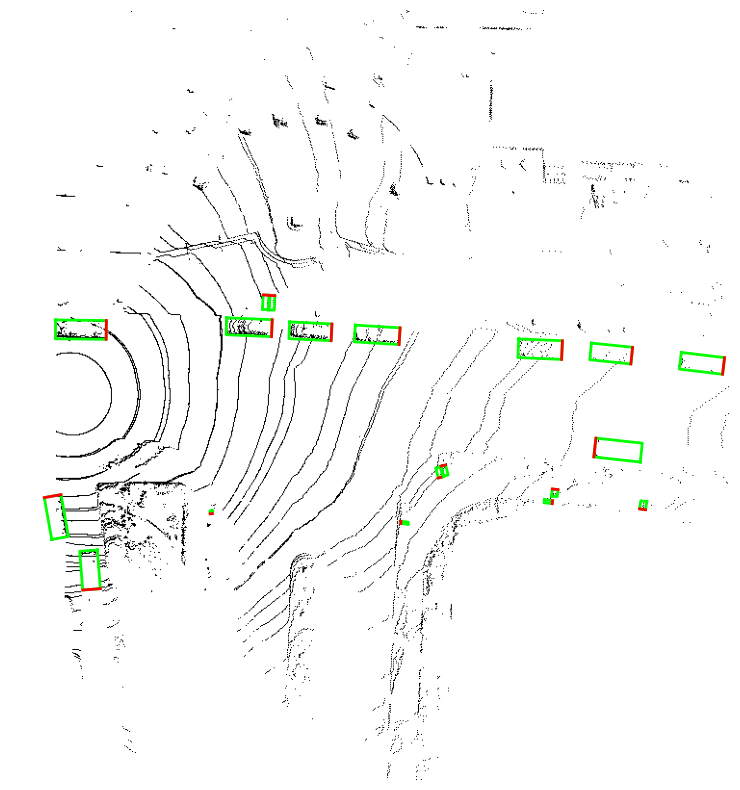

LOG: plot_bev2 executed
LOG: executing plot_label_map


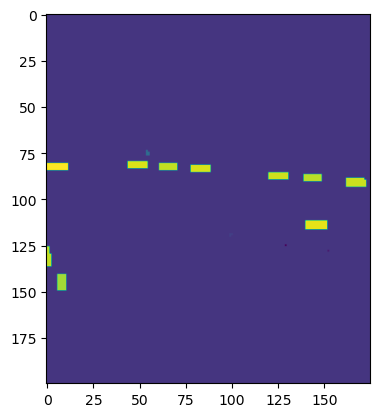

LOG: plot_label_map executed
LOG: executing plot_label_map


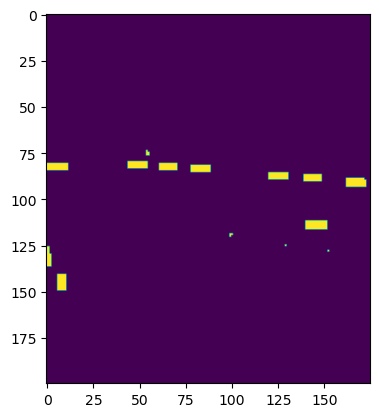

LOG: plot_label_map executed


In [4]:
test0()